In [50]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [51]:
data = pd.read_csv('D:\\Data sets\\true_car_listings.csv')

In [52]:
data = data.head(10000)


In [53]:
data.drop(['City', 'State', 'Vin'], axis=1, inplace=True)

In [54]:
le = LabelEncoder()

In [55]:
data.Make = le.fit_transform(data.Make)
data.Model = le.fit_transform(data.Model)

In [56]:
data.isna().sum()

Price      0
Year       0
Mileage    0
Make       0
Model      0
dtype: int64

In [57]:
data.dtypes

Price      int64
Year       int64
Mileage    int64
Make       int32
Model      int32
dtype: object

In [58]:
x = data.drop(['Price'], axis=1)
y = data.Price

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [60]:
knn = KNeighborsRegressor(n_neighbors=5)

In [61]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [62]:
knn.score(x_train, y_train)

0.7218600498001879

In [63]:
knn.predict(x_test)

array([22291.8, 20533.4, 24060.6, ..., 29602. , 33295.8, 26764.2])

In [64]:
mse = []
r2Score = []

for k in range(1,20):
    reg_knn = KNeighborsRegressor(n_neighbors=k)
    reg_knn.fit(x_train,y_train)
    pred = reg_knn.predict(x_test)
    mse.append(mean_squared_error(y_test,pred))
    r2Score.append(r2_score(y_test,pred))

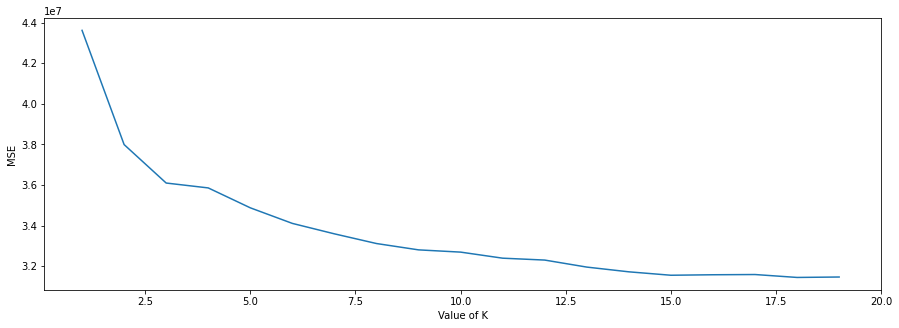

In [65]:
plt.figure(figsize = (15,5))
plt.plot(range(1,20),mse)
plt.xlim(right = 20)
plt.xlabel("Value of K")
plt.ylabel("MSE")
plt.show()

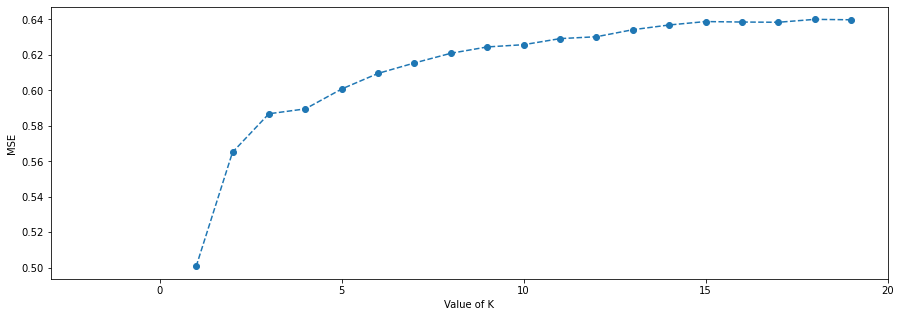

In [66]:
plt.figure(figsize = (15,5))
plt.plot(range(1,20),r2Score,linestyle = 'dashed',marker = 'o')
plt.xlim(-3,20)
plt.xlabel("Value of K")
plt.ylabel("MSE")
plt.show()